Problem statement : Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts

As a data scientist the job in hand for this case study is to segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Using manual clustering and also clustering algorithms such as K-means clustering, hierarchial clustering we are going to group the learners based on the features mentioned above.
Such data can be used for targeted marketing and hence we can understand which learners can best benefit from scaler courses

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer

In [3]:
scaler = pd.read_csv('C:/DSML/Case study/SCALER - Clustering/Scaler_clustering.csv')

In [4]:
scaler.shape

(205843, 7)

In [5]:
scaler.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [6]:
scaler.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [7]:
scaler.dtypes

Unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [8]:
scaler.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
scaler.dtypes

company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

# Missing value detection

In [10]:
scaler.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

# Statistical summary

In [11]:
scaler_stat = scaler[['orgyear','ctc','ctc_updated_year']]

In [12]:
scaler_stat.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


# Data Pre-processing

# Missing value treatment¶

# KNN Imputer for organization year(employee start year)

In [13]:
orgyear_imp = scaler[['orgyear']]

In [14]:
imputer = KNNImputer(n_neighbors=5)
imputation = imputer.fit_transform(orgyear_imp)
orgyear_imp = pd.DataFrame(imputation)

In [15]:
scaler['orgyear'] = orgyear_imp[0]

In [16]:
scaler.isna().sum()

company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

# Simple Imputer for job position and company name

In [17]:
job_pos_pd = pd.DataFrame(scaler['job_position'])
job_pos_np = SimpleImputer(strategy="most_frequent").fit_transform(job_pos_pd)
job_pos_np = job_pos_np.reshape(len(scaler['job_position']))
scaler['job_position'] = pd.Series(job_pos_np)

In [18]:
scaler.isna().sum()

company_hash        44
email_hash           0
orgyear              0
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [19]:
job_pos_pd = pd.DataFrame(scaler['company_hash'])
job_pos_np = SimpleImputer(strategy="most_frequent").fit_transform(job_pos_pd)
job_pos_np = job_pos_np.reshape(len(scaler['company_hash']))
scaler['company_hash'] = pd.Series(job_pos_np)

In [20]:
scaler.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

# Regex for cleaning company names

In [21]:
import re
def remove_special(string):
    new_string = re.sub('[^A-Za-z ]'+'','',string)
    return new_string

In [22]:
scaler.company_hash = scaler.company_hash.apply(lambda x: remove_special(str(x)))
scaler.company_hash = scaler.company_hash.apply(lambda x: x.lower())
scaler.company_hash = scaler.company_hash.apply(lambda x: x.strip())
scaler.company_hash

0                    atrgxnnt xzaxv
1         qtrxvzwt xzegwgbb rxbxnta
2                     ojzwnvwnxw vx
3                         ngpgutaxv
4                        qxen sqghu
                    ...            
205838                    vuurt xzw
205839                    husqvawgb
205840                     vwwgrxnt
205841               zgn vuurxwvmrt
205842               bgqsvz onvzrtj
Name: company_hash, Length: 205843, dtype: object

In [23]:
scaler.drop_duplicates(subset=['company_hash', 'email_hash'], keep='last',inplace=True)

In [24]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,Backend Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Backend Engineer,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Backend Engineer,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Backend Engineer,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Backend Engineer,2019.0


In [25]:
scaler['YOE'] = (pd.datetime.now().year) - scaler['orgyear']

C:\Users\pgpra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [26]:
scaler['YOE']

0          7.0
2          8.0
3          6.0
7          4.0
9          4.0
          ... 
205838    15.0
205839     6.0
205840     2.0
205841     4.0
205842     9.0
Name: YOE, Length: 160310, dtype: float64

# Manual Clustering

In [27]:
scaler_tier = pd.DataFrame()

In [28]:
scaler_tier['tier_25th'] = scaler.groupby('company_hash')['ctc'].quantile(0.25)
scaler_tier['tier_75th'] = scaler.groupby('company_hash')['ctc'].quantile(0.75)
scaler_tier['tier_100th'] = scaler.groupby('company_hash')['ctc'].quantile(1.0)

In [29]:
scaler_tier

,tier_25th,tier_75th,tier_100th
company_hash,,,
,450000.0,1400000.0,200000000.0
a,900000.0,900000.0,900000.0
a b onttr wgqu,180000.0,180000.0,180000.0
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,463999.0,463999.0,463999.0
a ntwy ogrhnxgzo ucn rna,400000.0,400000.0,400000.0
...,...,...,...
zz,717500.0,1152500.0,1370000.0
zz wgzztwn mya,23800.0,23800.0,23800.0
zzb ztdnstz vacxogqj ucn rna,600000.0,600000.0,600000.0


In [30]:
scaler_class = pd.DataFrame()

In [31]:
scaler_class['class_25th'] = scaler.groupby(['company_hash','job_position'])['ctc'].quantile(0.25)
scaler_class['class_75th'] = scaler.groupby(['company_hash','job_position'])['ctc'].quantile(0.75)
scaler_class['class_100th'] = scaler.groupby(['company_hash','job_position'])['ctc'].quantile(1.0)

In [32]:
scaler_class

class_25th  class_75th  \
company_hash                 job_position                                 
                             Android Engineer      480000.0    480000.0   
                             Backend Engineer      570000.0   1400000.0   
                             Data Analyst         2100000.0   2100000.0   
                             Data Scientist       2100000.0   2100000.0   
                             Engineering Intern    850000.0    850000.0   
...                                                     ...         ...   
zz                           Other                1370000.0   1370000.0   
zz wgzztwn mya               Other                  23800.0     23800.0   
zzb ztdnstz vacxogqj ucn rna Backend Engineer      600000.0    600000.0   
zzgato                       Backend Engineer      130000.0    130000.0   
zzzbzb                       Other                 720000.0    720000.0   

                                                 class_100th  
company_hash                 job_position                     
                             Android Engineer       480000.0  
                             Backend Engineer    200000000.0  
                             Data Analyst          2100000.0  
                             Data Scientist        2100000.0  
                             Engineering Intern     850000.0  
...                                                      ...  
zz                           Other                 1370000.0  
zz wgzztwn mya               Other                   23800.0  
zzb ztdnstz vacxogqj ucn rna Backend Engineer       600000.0  
zzgato                       Backend Engineer       130000.0  
zzzbzb                       Other                  720000.0  

[59418 rows x 3 columns]

In [33]:
scaler_desig = pd.DataFrame()

In [34]:
scaler_desig['avg_CTC'] = scaler.groupby(['company_hash','job_position','YOE'])['ctc'].mean()

In [35]:
scaler_desig

avg_CTC
company_hash                 job_position     YOE             
                             Android Engineer 9.0     480000.0
                             Backend Engineer 2.0   50400000.0
                                              3.0    1280000.0
                                              4.0   17420500.0
                                              5.0     857750.0
...                                                        ...
zz                           Other            10.0   1370000.0
zz wgzztwn mya               Other            14.0     23800.0
zzb ztdnstz vacxogqj ucn rna Backend Engineer 6.0     600000.0
zzgato                       Backend Engineer 9.0     130000.0
zzzbzb                       Other            33.0    720000.0

[92864 rows x 1 columns]

In [36]:
# Meging all the above created DFs with the main dataframe

In [37]:
scaler = scaler.merge(scaler_tier, on = ['company_hash'], how='inner')

In [38]:
scaler = scaler.merge(scaler_class, on = ['company_hash','job_position'], how='inner')

In [39]:
scaler = scaler.merge(scaler_desig, on = ['company_hash','job_position','YOE'], how='inner')

In [40]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1100000.0
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1070000.0
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,500000,Backend Engineer,2020.0,4.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,500000.0
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1000000,Backend Engineer,2018.0,9.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,1000000.0
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1700000,Data Scientist,2020.0,6.0,800000.0,1500000.0,1771000.0,1700000.0,1700000.0,1700000.0,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160305,yjutq nqvwp,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012.0,2100000,Backend Engineer,2018.0,11.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0
160306,yga xzzgcvnxgz rvm ucn rna,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013.0,840000,Backend Engineer,2019.0,10.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0
160307,ztdnowb xzwqtee,29f02bc29797857294cfcd44273ad42f64281ea79203f0...,2014.0,5266000,Backend Engineer,2015.0,9.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0
160308,mrht onvnt axsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013.0,85000,Backend Engineer,2016.0,10.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0


In [41]:
scaler['company_tier'] = 0

In [42]:
scaler.loc[(scaler['ctc'] < scaler['tier_25th']),'company_tier'] = 4

In [43]:
scaler.loc[(scaler['ctc'] < scaler['tier_75th']) & (scaler['ctc'] >= scaler['tier_25th']),'company_tier'] = 3

In [44]:
scaler.loc[(scaler['ctc'] < scaler['tier_100th']) & (scaler['ctc'] >= scaler['tier_75th']),'company_tier'] = 2

In [45]:
scaler.loc[(scaler['ctc'] >= scaler['tier_100th']),'company_tier'] = 1

In [46]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1100000.0,3
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1070000.0,3
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,500000,Backend Engineer,2020.0,4.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,500000.0,4
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1000000,Backend Engineer,2018.0,9.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,1000000.0,3
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1700000,Data Scientist,2020.0,6.0,800000.0,1500000.0,1771000.0,1700000.0,1700000.0,1700000.0,1700000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160305,yjutq nqvwp,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012.0,2100000,Backend Engineer,2018.0,11.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,1
160306,yga xzzgcvnxgz rvm ucn rna,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013.0,840000,Backend Engineer,2019.0,10.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,1
160307,ztdnowb xzwqtee,29f02bc29797857294cfcd44273ad42f64281ea79203f0...,2014.0,5266000,Backend Engineer,2015.0,9.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,1
160308,mrht onvnt axsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013.0,85000,Backend Engineer,2016.0,10.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,1


In [47]:
scaler['position_tier'] = 0

In [48]:
scaler.loc[(scaler['ctc'] < scaler['class_25th']),'position_tier'] = 4

In [49]:
scaler.loc[(scaler['ctc'] < scaler['class_75th']) & (scaler['ctc'] >= scaler['class_25th']),'position_tier'] = 3

In [50]:
scaler.loc[(scaler['ctc'] < scaler['class_100th']) & (scaler['ctc'] >= scaler['class_75th']),'position_tier'] = 2

In [51]:
scaler.loc[(scaler['ctc'] >= scaler['class_100th']),'position_tier'] = 1

In [52]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1100000.0,3,1
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1070000.0,3,4
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,500000,Backend Engineer,2020.0,4.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,500000.0,4,4
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1000000,Backend Engineer,2018.0,9.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,1000000.0,3,1
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1700000,Data Scientist,2020.0,6.0,800000.0,1500000.0,1771000.0,1700000.0,1700000.0,1700000.0,1700000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160305,yjutq nqvwp,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012.0,2100000,Backend Engineer,2018.0,11.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,1,1
160306,yga xzzgcvnxgz rvm ucn rna,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013.0,840000,Backend Engineer,2019.0,10.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,1,1
160307,ztdnowb xzwqtee,29f02bc29797857294cfcd44273ad42f64281ea79203f0...,2014.0,5266000,Backend Engineer,2015.0,9.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,1,1
160308,mrht onvnt axsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013.0,85000,Backend Engineer,2016.0,10.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,1,1


In [53]:
scaler['designation_tier'] = 0

In [54]:
scaler.loc[(scaler['ctc'] < scaler['avg_CTC']),'designation_tier'] = 3

In [55]:
scaler.loc[(scaler['ctc'] == scaler['avg_CTC']),'designation_tier'] = 2

In [56]:
scaler.loc[(scaler['ctc'] > scaler['avg_CTC']),'designation_tier'] = 1

In [57]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1100000.0,3,1,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,800000.0,1500000.0,1771000.0,1077500.0,1092500.0,1100000.0,1070000.0,3,4,2
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,500000,Backend Engineer,2020.0,4.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,500000.0,4,4,2
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1000000,Backend Engineer,2018.0,9.0,800000.0,1500000.0,1771000.0,625000.0,875000.0,1000000.0,1000000.0,3,1,2
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1700000,Data Scientist,2020.0,6.0,800000.0,1500000.0,1771000.0,1700000.0,1700000.0,1700000.0,1700000.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160305,yjutq nqvwp,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012.0,2100000,Backend Engineer,2018.0,11.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,2100000.0,1,1,2
160306,yga xzzgcvnxgz rvm ucn rna,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013.0,840000,Backend Engineer,2019.0,10.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,840000.0,1,1,2
160307,ztdnowb xzwqtee,29f02bc29797857294cfcd44273ad42f64281ea79203f0...,2014.0,5266000,Backend Engineer,2015.0,9.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,5266000.0,1,1,2
160308,mrht onvnt axsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013.0,85000,Backend Engineer,2016.0,10.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,1,1,2


# Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [58]:
scaler.loc[(scaler['company_tier'] == 1)].sort_values(by=['ctc'], ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
133430,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,Backend Engineer,2020.0,8.0,1.000150e+09,1.000150e+09,1.000150e+09,1.000150e+09,1.000150e+09,1.000150e+09,1.000150e+09,1,1,2
131108,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,Backend Engineer,2016.0,5.0,1.100000e+06,2.200000e+06,2.555556e+08,2.555556e+08,2.555556e+08,2.555556e+08,2.555556e+08,1,1,2
77068,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,Backend Engineer,2020.0,2.0,2.500000e+08,2.500000e+08,2.500000e+08,2.500000e+08,2.500000e+08,2.500000e+08,2.500000e+08,1,1,2
55118,psxor,1b9cb9fd05dd794efc20da0f5e873f1afc92767306166b...,2017.0,200000000,Other,2020.0,6.0,3.500000e+05,2.953750e+07,2.000000e+08,5.562500e+05,1.362500e+08,2.000000e+08,1.003375e+08,1,1,1
149189,ogzv wgrrtst ge ntwyzgrgsjvzzv hzxctqoxnj,a1dab27546c9b811ef4183d7b4ba19135241a44e6f1d15...,2016.0,200000000,Non Coder,2020.0,7.0,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,1,1,2
35386,otre tburgjta,3c453dd102ae47a4ed1841be352213fad363d0944177e9...,2020.0,200000000,Backend Engineer,2020.0,3.0,3.000000e+05,1.090000e+06,2.000000e+08,4.000000e+05,1.175000e+06,2.000000e+08,5.080750e+07,1,1,1
35127,otre tburgjta,5f39783f33de6430635e8e1770cc93e9d73e40cd7ed6dd...,2017.0,200000000,Other,2020.0,6.0,3.000000e+05,1.090000e+06,2.000000e+08,3.000000e+05,1.200000e+06,2.000000e+08,4.012540e+07,1,1,1
35117,otre tburgjta,2dfd6e8346ec1a69281cdb0242e3812982639f73bb7893...,2019.0,200000000,Other,2020.0,4.0,3.000000e+05,1.090000e+06,2.000000e+08,3.000000e+05,1.200000e+06,2.000000e+08,3.358333e+07,1,1,1
35112,otre tburgjta,4f83774dfe4b97bfd0836463f3a573aa82725aa8e0f4a4...,2020.0,200000000,Other,2020.0,3.0,3.000000e+05,1.090000e+06,2.000000e+08,3.000000e+05,1.200000e+06,2.000000e+08,6.047200e+07,1,1,1
35100,otre tburgjta,f63e63a8cc3db37c89a49f0498d0731f8c9e2e27943e85...,2015.0,200000000,Android Engineer,2020.0,8.0,3.000000e+05,1.090000e+06,2.000000e+08,1.625000e+05,7.350000e+05,2.000000e+08,6.700000e+07,1,1,1


# Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1

In [59]:
scaler.loc[(scaler['position_tier'] == 1) & (scaler['job_position'] == 'Data Scientist') & (scaler['company_hash'] == 'adw ntwyzgrgsxto')].sort_values(by=['ctc'], ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
41315,adw ntwyzgrgsxto,d561093f7768b6db57a81e98f90897028dcf48881123d8...,2014.0,1760000,Data Scientist,2019.0,9.0,450000.0,1035000.0,100000000.0,925000.0,1745000.0,1760000.0,1760000.0,2,1,2
41316,adw ntwyzgrgsxto,48a8a96b2f7e20c1f3e72b6492797a26cd4f7d373f971b...,2014.0,1760000,Data Scientist,2019.0,9.0,450000.0,1035000.0,100000000.0,925000.0,1745000.0,1760000.0,1760000.0,2,1,2


# Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 4

In [60]:
# Mentioning the code here as comment also since the whole code is not visible in the converted PDF file

# scaler.loc[(scaler['position_tier'] == 4) & (scaler['job_position'] == 'Data Scientist') & 
# (scaler['company_hash'] == 'adw ntwyzgrgsxto')].sort_values(by=['ctc'], ascending=True).head(10)

In [61]:
scaler.loc[(scaler['position_tier'] == 4) & (scaler['job_position'] == 'Data Scientist') & (scaler['company_hash'] == 'adw ntwyzgrgsxto')].sort_values(by=['ctc'], ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
41317,adw ntwyzgrgsxto,0723dbae72ae34fb6b4b5bf1a0a3cef4751b545e63ede9...,2010.0,750000,Data Scientist,2020.0,13.0,450000.0,1035000.0,100000000.0,925000.0,1745000.0,1760000.0,750000.0,3,4,2
41318,adw ntwyzgrgsxto,9d86d50a7efb301421e6cfa809963fd8a6e1f9dee965dc...,2013.0,900000,Data Scientist,2018.0,10.0,450000.0,1035000.0,100000000.0,925000.0,1745000.0,1760000.0,900000.0,3,4,2


# Bottom 10 employees (earning less than most of the employees in the company)- Tier 4

In [62]:
scaler.loc[(scaler['company_tier'] == 4)].sort_values(by=['ctc'], ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
75822,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,Backend Engineer,2019.0,9.0,200000.00,2000000.00,10000000.0,200000.00,1200000.00,10000000.0,1.300001e+06,4,4,3
75820,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,Backend Engineer,2018.0,10.0,200000.00,2000000.00,10000000.0,200000.00,1200000.00,10000000.0,2.233400e+05,4,4,3
75819,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,Backend Engineer,2018.0,10.0,200000.00,2000000.00,10000000.0,200000.00,1200000.00,10000000.0,2.233400e+05,4,4,3
156930,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,Backend Engineer,2018.0,7.0,15.25,15.75,16.0,15.25,15.75,16.0,1.500000e+01,4,4,2
124858,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022.0,200,Backend Engineer,2021.0,1.0,2100.00,47000.00,90000.0,200.00,200.00,200.0,2.000000e+02,4,1,2
75153,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023.0,600,Backend Engineer,2019.0,0.0,500000.00,1600000.00,200000000.0,500000.00,1650000.00,200000000.0,2.300883e+06,4,4,3
23980,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,Backend Engineer,2017.0,11.0,380000.00,700000.00,200000000.0,380000.00,700000.00,200000000.0,2.437096e+06,4,4,3
3153,gnytqo,f8574b672112433b60b8ca5178ccd918a3f21b1c2e27fc...,2018.0,1000,Other,2020.0,5.0,367500.00,842500.00,200000000.0,400000.00,937500.00,200000000.0,5.002000e+05,4,4,3
93732,cxo wvqttqo,daa966561c4087398b3c3b13855ce17adcf5e08dda803f...,2012.0,1000,Android Engineer,2017.0,11.0,195000.00,1950000.00,100000000.0,1000.00,1000.00,1000.0,1.000000e+03,4,1,2
118325,tuxw,fdd4a762ae373cfa10fa2bf6dc995c8ed540160b834d0a...,2013.0,1000,FullStack Engineer,2019.0,10.0,111000.00,160000.00,105000000.0,112000.00,154000.00,10100000.0,8.800000e+04,4,4,3


# Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [63]:
# Mentioning the code here as comment also since the whole code is not visible in the converted PDF file

# scaler.loc[((scaler['YOE'] == 5.0) & (scaler['job_position'] == 'Backend Engineer') & 
# (scaler['company_hash'] == 'obvqnuqxdwgb') & (scaler['company_tier'] == 1)) | ((scaler['YOE'] == 6.0) & 
# (scaler['job_position'] == 'Backend Engineer') & (scaler['company_hash'] == 'obvqnuqxdwgb') & 
# (scaler['company_tier'] == 1)) | ((scaler['YOE'] == 7.0) & (scaler['job_position'] == 'Backend Engineer') & 
# (scaler['company_hash'] == 'obvqnuqxdwgb') & (scaler['company_tier'] == 1))].sort_values(by=['ctc'], ascending=False).head(10)

In [64]:
scaler.loc[((scaler['YOE'] == 5.0) & (scaler['job_position'] == 'Backend Engineer') & (scaler['company_hash'] == 'obvqnuqxdwgb') & (scaler['company_tier'] == 1)) | ((scaler['YOE'] == 6.0) & (scaler['job_position'] == 'Backend Engineer') & (scaler['company_hash'] == 'obvqnuqxdwgb') & (scaler['company_tier'] == 1)) | ((scaler['YOE'] == 7.0) & (scaler['job_position'] == 'Backend Engineer') & (scaler['company_hash'] == 'obvqnuqxdwgb') & (scaler['company_tier'] == 1))].sort_values(by=['ctc'], ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
131108,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,Backend Engineer,2016.0,5.0,1100000.0,2200000.0,255555555.0,255555555.0,255555555.0,255555555.0,255555555.0,1,1,2


# Top 10 companies (based on their CTC)

In [65]:
scaler.groupby('company_hash').sum('ctc').sort_values(by='ctc',ascending=False).head(10)

,orgyear,ctc,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
company_hash,,,,,,,,,,,,,,
nvnv wgzohrnvzwj otqcxwto,1.104559e+07,11275465584,11061215.0,32357.23450,2.080880e+09,3.833200e+09,1.095200e+12,2.105763e+09,3.922641e+09,8.764754e+11,1.127547e+10,16101,16087,14787
vbvkgz,5.282665e+06,9630599469,5291973.0,19618.00000,2.358900e+09,8.387200e+09,5.242000e+11,3.069101e+09,8.136241e+09,3.918574e+11,9.630599e+09,7829,7752,6053
zgn vuurxwvmrt vwwghzn,4.703823e+06,6759197287,4714738.0,15836.00000,8.165500e+08,2.566300e+09,4.661334e+11,1.174366e+09,2.875994e+09,3.233286e+11,6.759197e+09,6950,6844,5617
zgn vuurxwvmrt,2.157760e+06,5939526113,2159461.0,4827.00000,3.848400e+08,1.603500e+09,2.138000e+11,3.949050e+08,1.595490e+09,2.120076e+11,5.939526e+09,3178,3179,3023
xzegojo,7.249895e+06,5866149332,7261240.0,22790.00000,1.438000e+09,2.613565e+09,7.190000e+11,1.497892e+09,2.726360e+09,5.548628e+11,5.866149e+09,10649,10518,9381
vwwtznhqt,4.062444e+06,5539808957,4070132.0,13901.23450,9.067500e+08,1.954550e+09,4.030000e+11,9.957019e+08,2.076922e+09,3.158534e+11,5.539809e+09,5929,5893,5071
bxwqgogen,3.220359e+06,5385366199,3227999.0,14418.00000,2.718300e+09,5.596500e+09,3.198000e+11,2.794565e+09,5.664280e+09,1.219068e+11,5.385366e+09,4747,4707,3455
fxuqg rxbxnta,3.599963e+06,5059991108,3605535.0,11092.00000,6.783000e+08,1.428000e+09,3.570000e+11,7.109294e+08,1.469885e+09,3.196000e+11,5.059991e+09,5302,5206,4490
wgszxkvzn,4.516053e+06,4371082696,4524502.0,15467.11725,8.960000e+08,1.859200e+09,4.480000e+11,1.043812e+09,2.005525e+09,3.248723e+11,4.371083e+09,6527,6526,5645


# Top 2 positions in every company (based on their CTC)

In [66]:
scaler1 = scaler.groupby(['company_hash','job_position']).sum('ctc')

In [67]:
scaler1 = scaler1.sort_values(by=['company_hash','ctc'],ascending=[True,False])

In [68]:
scaler1.groupby(['company_hash']).head(2).reset_index()

,company_hash,job_position,orgyear,ctc,ctc_updated_year,YOE,tier_25th,tier_75th,tier_100th,class_25th,class_75th,class_100th,avg_CTC,company_tier,position_tier,designation_tier
0,,Backend Engineer,70572.0,334327000,70667.0,233.0,15750000.0,49000000.0,7.000000e+09,19950000.0,49000000.0,7.000000e+09,334327000.0,98,103,84
1,,Other,22190.0,108480000,22214.0,63.0,4950000.0,15400000.0,2.200000e+09,3300000.0,17490000.0,1.100000e+09,108480000.0,35,31,24
2,a,Product Manager,2017.0,900000,2019.0,6.0,900000.0,900000.0,9.000000e+05,900000.0,900000.0,9.000000e+05,900000.0,1,1,2
3,a b onttr wgqu,Other,2019.0,180000,2021.0,4.0,180000.0,180000.0,1.800000e+05,180000.0,180000.0,1.800000e+05,180000.0,1,1,2
4,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,Other,2015.0,463999,2019.0,8.0,463999.0,463999.0,4.639990e+05,463999.0,463999.0,4.639990e+05,463999.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44880,zz,Backend Engineer,2009.0,500000,2021.0,14.0,717500.0,1152500.0,1.370000e+06,500000.0,500000.0,5.000000e+05,500000.0,4,1,2
44881,zz wgzztwn mya,Other,2009.0,23800,2017.0,14.0,23800.0,23800.0,2.380000e+04,23800.0,23800.0,2.380000e+04,23800.0,1,1,2
44882,zzb ztdnstz vacxogqj ucn rna,Backend Engineer,2017.0,600000,2021.0,6.0,600000.0,600000.0,6.000000e+05,600000.0,600000.0,6.000000e+05,600000.0,1,1,2
44883,zzgato,Backend Engineer,2014.0,130000,2017.0,9.0,130000.0,130000.0,1.300000e+05,130000.0,130000.0,1.300000e+05,130000.0,1,1,2


In [69]:
######################################

In [70]:
scaler.drop(['tier_25th','tier_75th','tier_100th','class_25th','class_75th','class_100th','class_100th','avg_CTC'],axis=1,inplace=True)

In [71]:
######################################

In [72]:
scaler.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'YOE', 'company_tier', 'position_tier',
       'designation_tier'],
      dtype='object')

# Univariate analysis

<AxesSubplot:xlabel='designation_tier', ylabel='Count'>

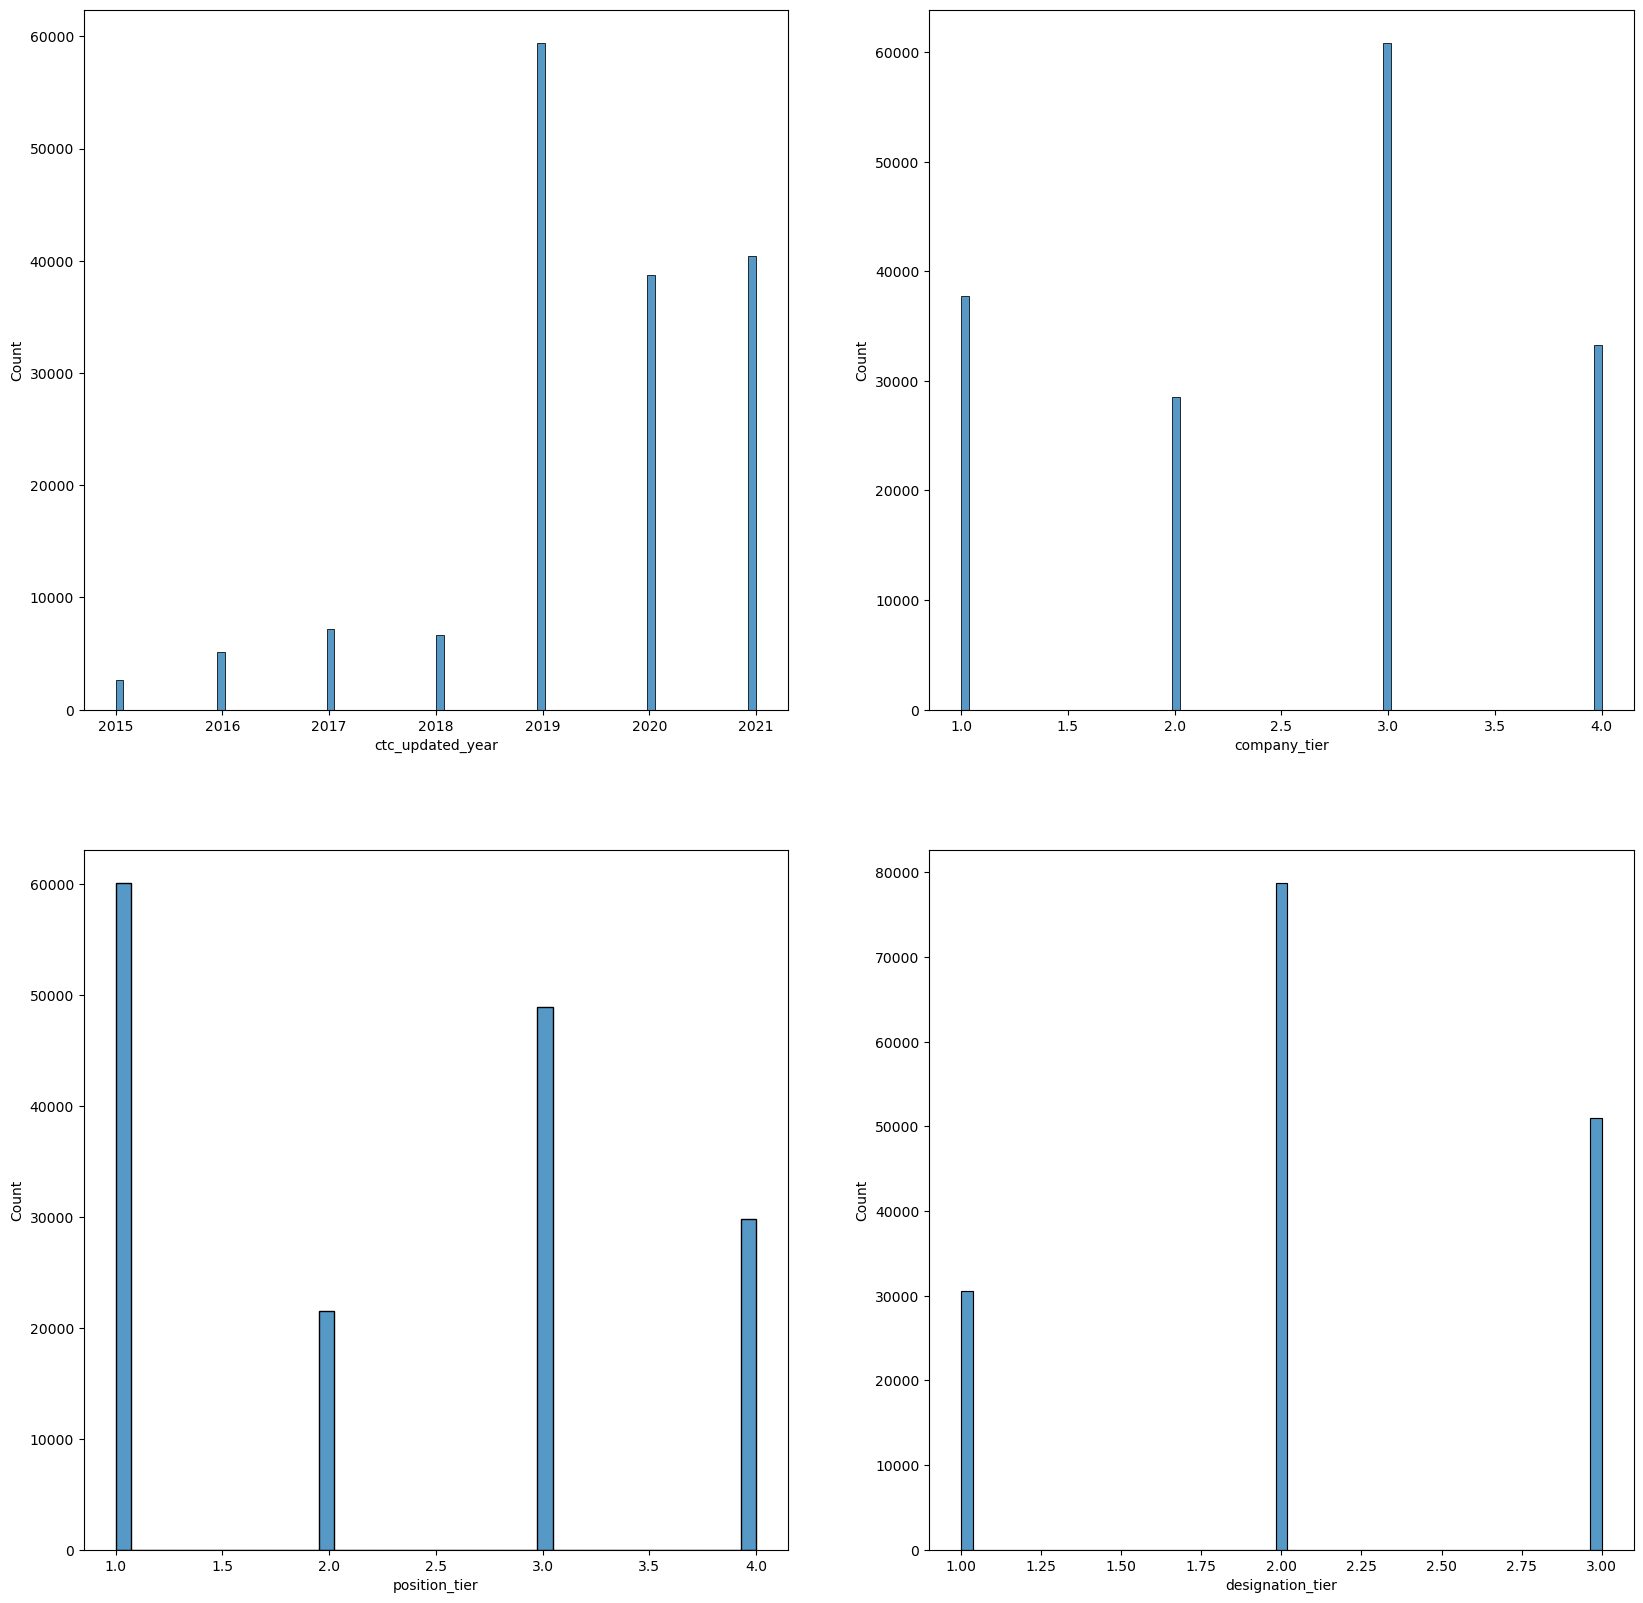

In [73]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
sns.histplot(x = 'ctc_updated_year',data = scaler,ax=axis[0,0])
sns.histplot(x = 'company_tier',data = scaler,ax=axis[0,1])
sns.histplot(x = 'position_tier',data = scaler,ax=axis[1,0])
sns.histplot(x = 'designation_tier',data = scaler,ax=axis[1,1])

(0.0, 10000000.0)

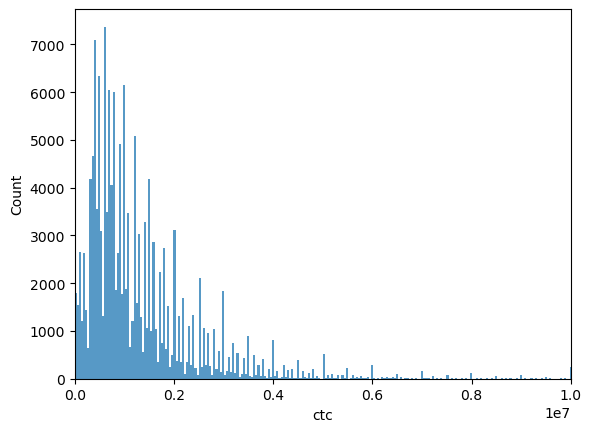

In [74]:
sns.histplot(x ='ctc',data = scaler)
plt.xlim(0,10000000)

(0.0, 100.0)

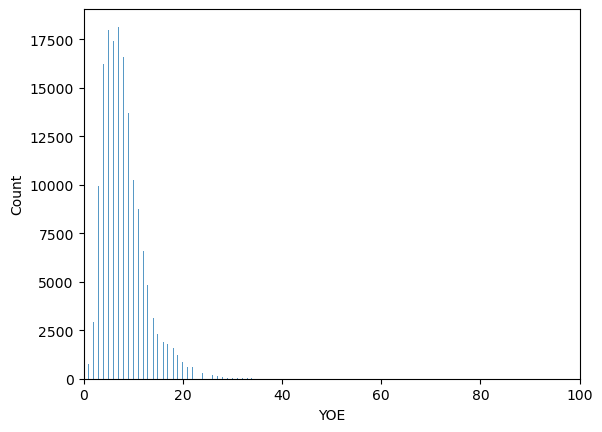

In [75]:
sns.histplot(x = 'YOE',data = scaler)
plt.xlim(0,100)

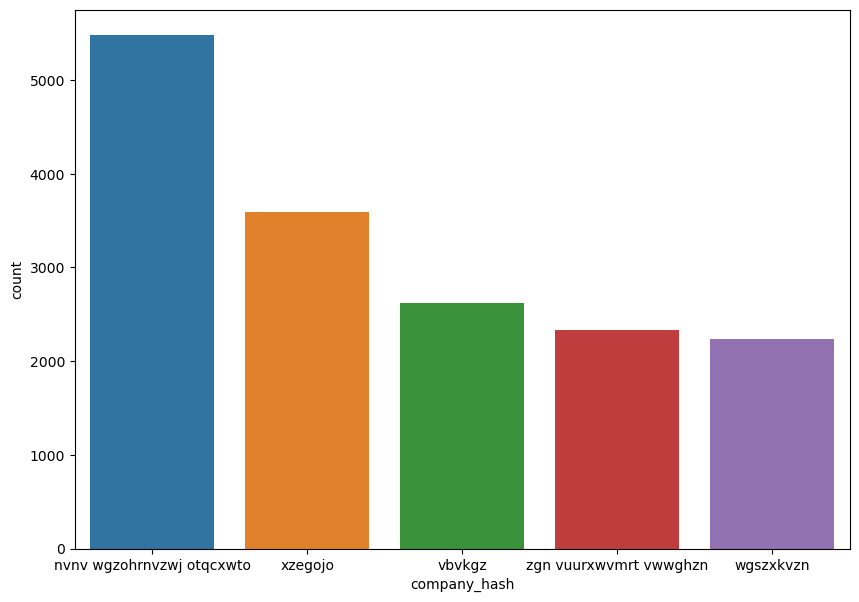

In [76]:
countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x = 'company_hash',data = scaler,order=scaler.value_counts(scaler['company_hash']).iloc[:5].index)

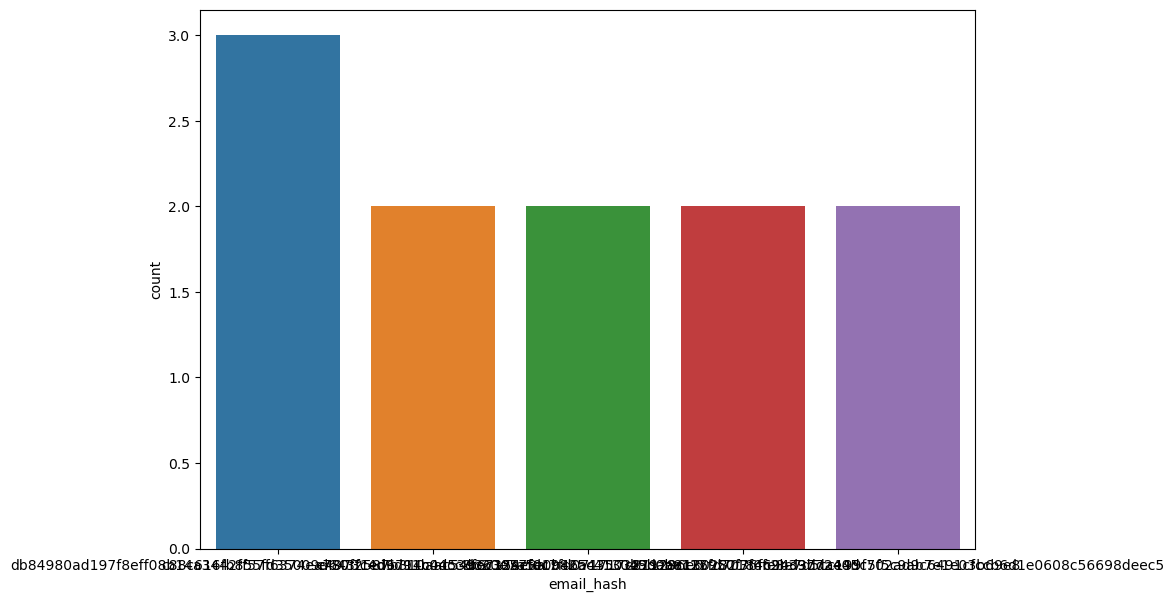

In [77]:
countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x = 'email_hash',data = scaler,order=scaler.value_counts(scaler['email_hash']).iloc[:5].index)

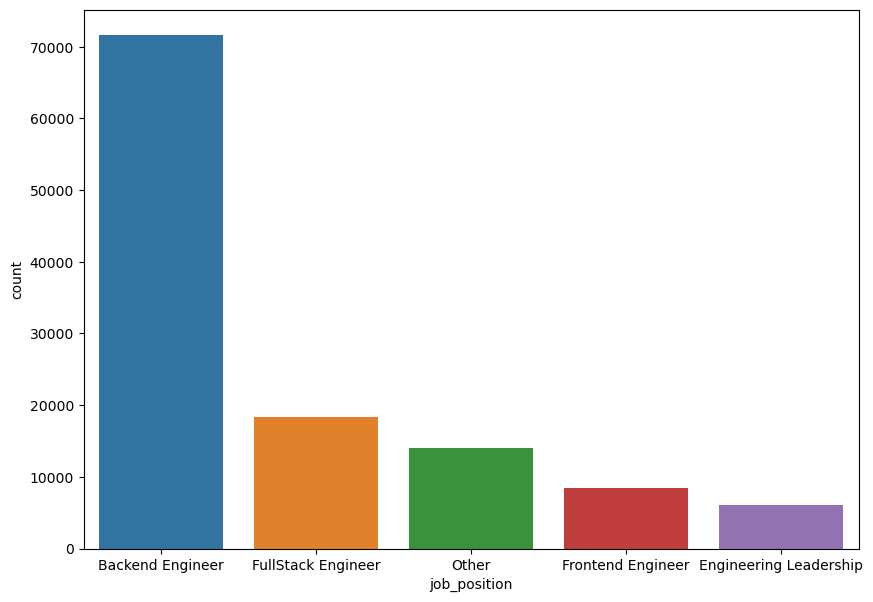

In [78]:
countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x = 'job_position',data = scaler,order=scaler.value_counts(scaler['job_position']).iloc[:5].index)

# Bivariate analysis

(0.0, 10000000.0)

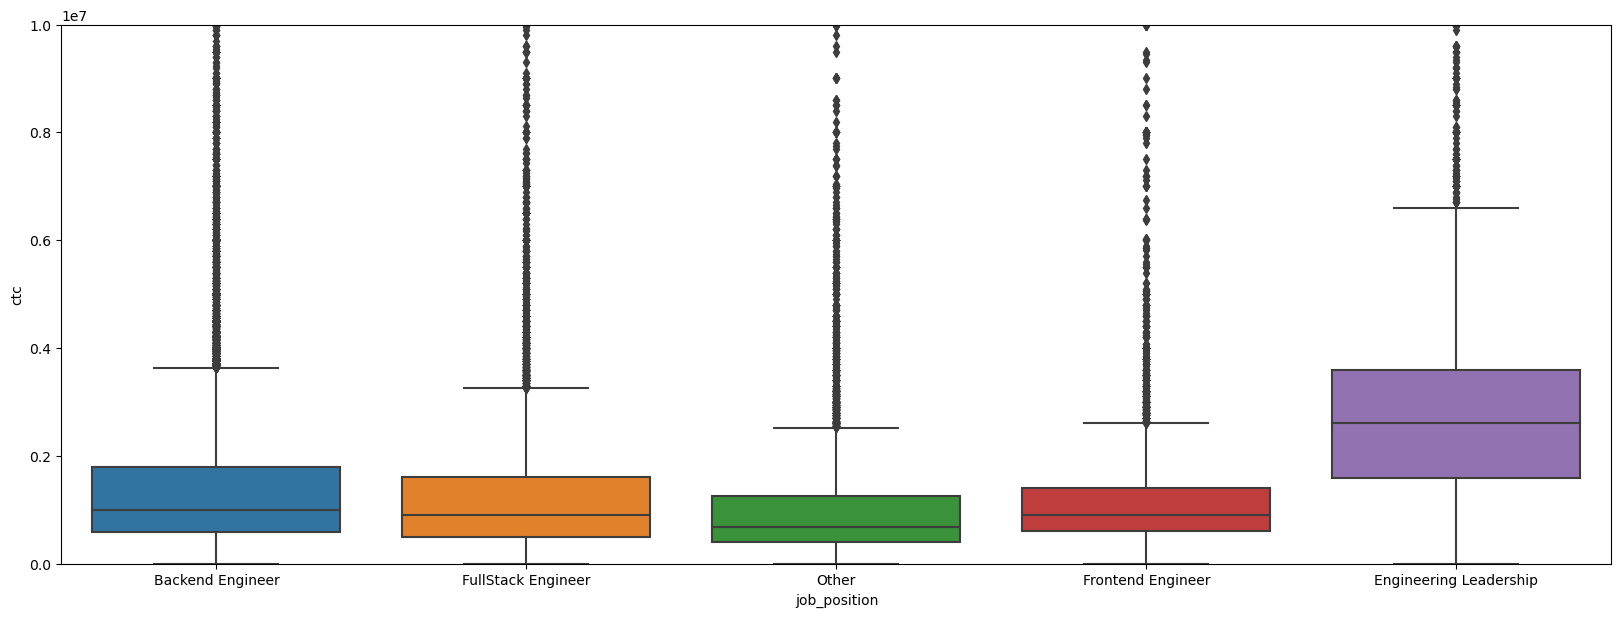

In [79]:
boxplt, ax = plt.subplots(figsize = (20,7))
ax = sns.boxplot(y = 'ctc',x = 'job_position',data=scaler,order=scaler.value_counts(scaler['job_position']).iloc[:5].index)
plt.ylim(0,10000000)

(0.0, 10000000.0)

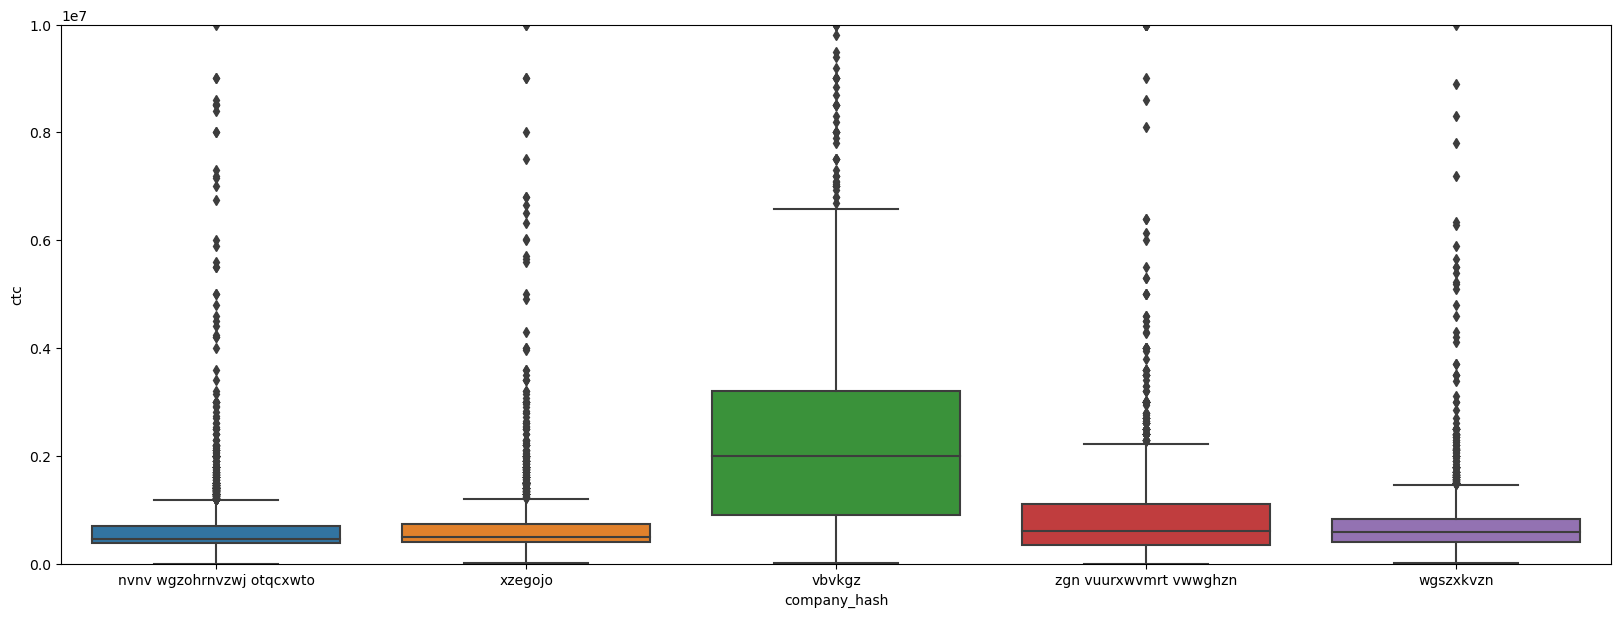

In [80]:
boxplt, ax = plt.subplots(figsize = (20,7))
ax = sns.boxplot(y = 'ctc',x = 'company_hash',data=scaler,order=scaler.value_counts(scaler['company_hash']).iloc[:5].index)
plt.ylim(0,10000000)

(0.0, 10000000.0)

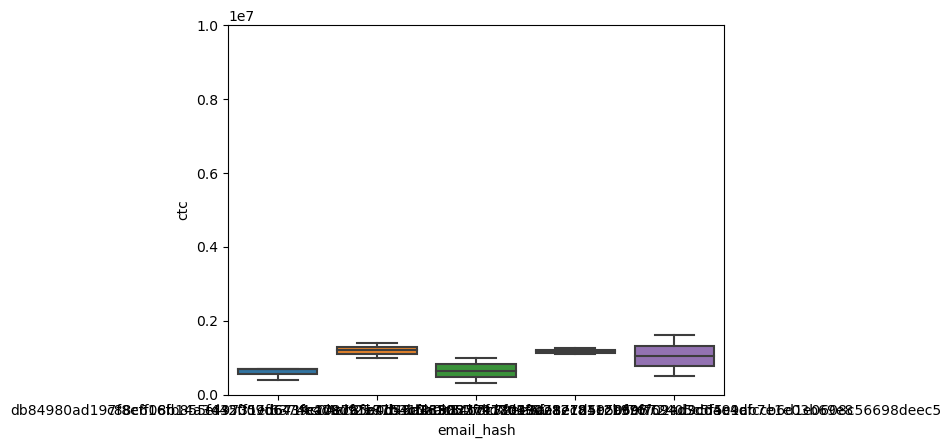

In [81]:
sns.boxplot(y = 'ctc',x = 'email_hash',data=scaler,order=scaler.value_counts(scaler['email_hash']).iloc[:5].index)
plt.ylim(0,10000000)

# Encoding

In [82]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

scaler['job_position']= label_encoder.fit_transform(scaler['job_position'])
scaler['ctc_updated_year']= label_encoder.fit_transform(scaler['ctc_updated_year'])
scaler['YOE']= label_encoder.fit_transform(scaler['YOE'])
scaler['ctc']= label_encoder.fit_transform(scaler['ctc'])
  
print(scaler['job_position'].nunique())
print(scaler['ctc_updated_year'].nunique())
print(scaler['YOE'].nunique())
print(scaler['ctc'].nunique())

708
7
78
3329


# Standardization

In [83]:
X = scaler[['ctc','job_position','ctc_updated_year','YOE','company_tier','position_tier','designation_tier']]

In [84]:
standard_scaler = StandardScaler()
standard_scaler.fit(X)

X = standard_scaler.transform(X)

In [85]:
X

array([[ 0.02725624,  0.97330131,  0.40615663, ...,  0.41479693,
        -1.12818043, -0.18219712],
       [-0.00511639,  0.97330131, -1.07412594, ...,  0.41479693,
         1.47068636, -0.18219712],
       [-0.8529709 , -0.67752216,  0.40615663, ...,  1.35479064,
         1.47068636, -0.18219712],
       ...,
       [ 2.03898375, -0.67752216, -3.2945498 , ..., -1.4651905 ,
        -1.12818043, -0.18219712],
       [-1.5713349 , -0.67752216, -2.55440852, ..., -1.4651905 ,
        -1.12818043, -0.18219712],
       [ 1.23429274, -0.67752216, -0.33398466, ..., -1.4651905 ,
        -1.12818043, -0.18219712]])

# Checking clustering tendency

In [86]:
from pyclustertend import hopkins

In [87]:
hopkins(X, X.shape[0])

0.037407955718717134

# Elbow method

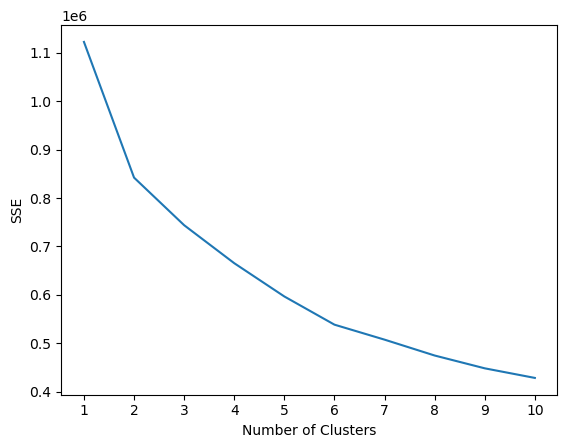

In [88]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# K-Means clustering

In [89]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(X)

#view cluster assignments for each observation
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 1])

In [90]:
scaler['cluster'] = kmeans.labels_

In [91]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,company_tier,position_tier,designation_tier,cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1370,308,5,19,3,1,2,1
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1349,308,3,22,3,4,2,0
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,799,101,5,16,4,4,2,0
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1285,101,3,22,3,1,2,1
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1792,149,5,18,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
160305,yjutq nqvwp,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012.0,2027,101,3,24,1,1,2,1
160306,yga xzzgcvnxgz rvm ucn rna,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013.0,1126,101,4,23,1,1,2,1
160307,ztdnowb xzwqtee,29f02bc29797857294cfcd44273ad42f64281ea79203f0...,2014.0,2675,101,0,22,1,1,2,1
160308,mrht onvnt axsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013.0,333,101,1,23,1,1,2,1


# Hierarchial clustering

In [92]:
scaler

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,company_tier,position_tier,designation_tier,cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1370,308,5,19,3,1,2,1
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1349,308,3,22,3,4,2,0
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,799,101,5,16,4,4,2,0
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1285,101,3,22,3,1,2,1
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1792,149,5,18,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
160305,yjutq nqvwp,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012.0,2027,101,3,24,1,1,2,1
160306,yga xzzgcvnxgz rvm ucn rna,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013.0,1126,101,4,23,1,1,2,1
160307,ztdnowb xzwqtee,29f02bc29797857294cfcd44273ad42f64281ea79203f0...,2014.0,2675,101,0,22,1,1,2,1
160308,mrht onvnt axsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013.0,333,101,1,23,1,1,2,1


In [93]:
import copy
scaler_hierarchial = copy.deepcopy(scaler)
scaler_hierarchial = scaler_hierarchial[0:20000]

In [94]:
scaler_hierarchial

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,company_tier,position_tier,designation_tier,cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1370,308,5,19,3,1,2,1
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1349,308,3,22,3,4,2,0
2,atrgxnnt xzaxv,a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...,2019.0,799,101,5,16,4,4,2,0
3,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014.0,1285,101,3,22,3,1,2,1
4,atrgxnnt xzaxv,ffc974693a2bfd0326c707d8460d6783861a9497e538e2...,2017.0,1792,149,5,18,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,wvustbxzx,50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89b...,2020.0,657,101,4,15,4,4,3,0
19996,wvustbxzx,936e6f2eeef71dd204686182da33467f5e9828f480b6eb...,2020.0,971,101,4,15,3,3,1,0
19997,wvustbxzx,d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429e...,2020.0,1570,101,4,15,2,2,1,1
19998,wvustbxzx,ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26f...,2020.0,657,101,4,15,4,4,3,0


In [95]:
scaler_hierarchial.drop(['orgyear','cluster'],axis=1,inplace=True)

In [96]:
scaler_hierarchial.set_index(['company_hash','email_hash'],inplace=True)

In [97]:
scaler_hierarchial

ctc  \
company_hash   email_hash                                                 
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...  1370   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...  1349   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...   799   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...  1285   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...  1792   
...                                                                 ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...   657   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...   971   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...  1570   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe...   657   
               f3ab23a7157afbfa853203bc5410a69107c01f9095579a9...  1045   

                                                                   job_position  \
company_hash   email_hash                                                         
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...           308   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...           308   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...           101   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...           101   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...           149   
...                                                                         ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...           101   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...           101   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...           101   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe...           101   
               f3ab23a7157afbfa853203bc5410a69107c01f9095579a9...           101   

                                                                   ctc_updated_year  \
company_hash   email_hash                                                             
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...                 5   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...                 3   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...                 5   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...                 3   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...                 5   
...                                                                             ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...                 4   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...                 4   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...                 4   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe...                 4   
               f3ab23a7157afbfa853203bc5410a69107c01f9095579a9...                 5   

                                                                   YOE  \
company_hash   email_hash                                                
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...   19   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...   22   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...   16   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...   22   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...   18   
...                                                                ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...   15   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...   15   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...   15   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe... 

In [98]:
std_scaler1 = StandardScaler()
std_scaler1.fit(scaler_hierarchial)
X_hierarchial = std_scaler1.transform(scaler_hierarchial)

In [99]:
scaled_df = pd.DataFrame(X_hierarchial, columns=scaler_hierarchial.columns, index=scaler_hierarchial.index)

In [100]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(scaled_df, metric='euclidean', method='ward')

In [102]:
from sklearn.cluster import AgglomerativeClustering
## Sklearn implementation of Hierarchical clustering

# create clusters
hc_scaler = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
y_pred = hc_scaler.fit_predict(scaled_df)

In [103]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [104]:
scaler_hierarchial['cluster'] = y_pred

In [105]:
scaler_hierarchial

ctc  \
company_hash   email_hash                                                 
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...  1370   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...  1349   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...   799   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...  1285   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...  1792   
...                                                                 ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...   657   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...   971   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...  1570   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe...   657   
               f3ab23a7157afbfa853203bc5410a69107c01f9095579a9...  1045   

                                                                   job_position  \
company_hash   email_hash                                                         
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...           308   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...           308   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...           101   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...           101   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...           149   
...                                                                         ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...           101   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...           101   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...           101   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe...           101   
               f3ab23a7157afbfa853203bc5410a69107c01f9095579a9...           101   

                                                                   ctc_updated_year  \
company_hash   email_hash                                                             
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...                 5   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...                 3   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...                 5   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...                 3   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...                 5   
...                                                                             ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...                 4   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...                 4   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...                 4   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe...                 4   
               f3ab23a7157afbfa853203bc5410a69107c01f9095579a9...                 5   

                                                                   YOE  \
company_hash   email_hash                                                
atrgxnnt xzaxv 6de0a4417d18ab14334c3f43397fc13b30c35149d70c050...   19   
               696f674fbc0d337b20152f91c43082bafaa243da70932c1...   22   
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475f...   16   
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5...   22   
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a...   18   
...                                                                ...   
wvustbxzx      50dc9d422a465bf48d13dbed4de2aeaf6df1607a08b89ba...   15   
               936e6f2eeef71dd204686182da33467f5e9828f480b6eb3...   15   
               d1e3e8162d6962132afcf5adcc1336f7f8fe708c44429eb...   15   
               ba3881e266aa9b3bdbe3ff1815c8cb8ab8d19102c4a26fe... 

# Insights and Recommendations